<a href="https://colab.research.google.com/github/sahibpreetsingh12/100daysofcode/blob/master/pdf_edu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import print_summary, to_categorical
import sys
import socket
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tqdm
np.set_printoptions(threshold=np.nan)

Using TensorFlow backend.


In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip gdrive/My\ Drive/Samples.zip

# **Training Model**

In [0]:

num_classes = 4
epochs = 10

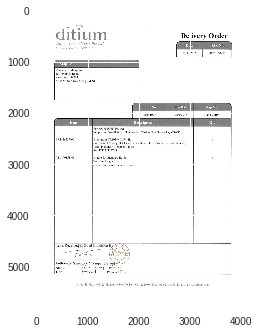

In [3]:
DATADIR = "/content/Samples"

CATEGORIES = ["DO_New"	, "Invoice_New" , "PaymentVoucher_New" , "PO_New"]
#print(len(CATEGORIES))
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img) )  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [0]:
IMG_SIZE = 256

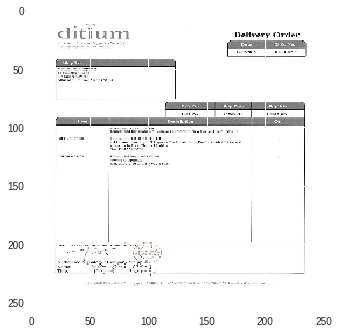

In [5]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()


In [6]:
new_array.shape

(256, 256, 3)

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category) 
        #print(class_num)

        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                #print([new_array, class_num])
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()


In [0]:

import random

random.shuffle(training_data)
#print(training_data[1])

In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X[0].shape

(256, 256, 3)

In [0]:
X = np.array(X).astype('float32')
X /= 255.0


In [0]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.3))
"""
model.add(Conv2D(128, (3, 3), padding='same', input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))
"""
model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(len(CATEGORIES)))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
one_hot_labels = keras.utils.to_categorical(y, num_classes=len(CATEGORIES))
print(len(one_hot_labels))
model.fit(X,one_hot_labels ,
          batch_size=32,
          epochs=20, validation_split=0.2
          )

77
Train on 61 samples, validate on 16 samples
Epoch 1/20
61/61 [==============================] - 16s 268ms/step - loss: 4.1501 - acc: 0.2787 - val_loss: 6.6686 - val_acc: 0.2500
Epoch 2/20
61/61 [==============================] - 15s 249ms/step - loss: 9.0718 - acc: 0.3770 - val_loss: 7.0517 - val_acc: 0.5625
Epoch 3/20
61/61 [==============================] - 15s 251ms/step - loss: 6.6446 - acc: 0.5738 - val_loss: 5.8289 - val_acc: 0.5625
Epoch 4/20
61/61 [==============================] - 15s 248ms/step - loss: 6.0400 - acc: 0.6230 - val_loss: 3.3526 - val_acc: 0.5625
Epoch 5/20
61/61 [==============================] - 15s 249ms/step - loss: 5.3795 - acc: 0.5410 - val_loss: 1.6328 - val_acc: 0.5625
Epoch 6/20
61/61 [==============================] - 15s 249ms/step - loss: 3.6355 - acc: 0.4918 - val_loss: 0.9407 - val_acc: 0.7500
Epoch 7/20
61/61 [==============================] - 15s 248ms/step - loss: 1.6217 - acc: 0.7541 - val_loss: 1.3303 - val_acc: 0.7500
Epoch 8/20
61/61 [====